In [4]:
import numpy as np  #linear algebra library
import pandas as pd #data manipulation library
import matplotlib.pyplot as plt #data visualization

In [5]:
#algorithm libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.decomposition import PCA

# importing the data
### now we load the "Heart Disease Dataset" from UCI MACHINE LEARNING REPOSITORY 

columns in dataset - 

    Age
    Sex
    cp : chest pain
    restbp : resting blood pressure (in mm Hg)
    chol : serum cholesterol in mg/dl
    fbs : fasting blood sugar
    restecg : resting electrocardiographic results
    thalach : maximum heart rate achieved
    exang : exercise induced angina
    oldpeak : ST depression induced by exercise relative to rest
    slope : the slope of the peak exercise ST segment.
    ca : number of major vessels (0-3) colored by fluoroscopy
    thal : this is short of thalium heart scan.
    hd : diagnosis of heart disease, the predicted attribute


In [6]:
columns = [
    "Age","Sex","cp","restbp","chol","fbs",
    "restecg","thalach","exang","oldpeak","slope",
    "ca","thal","target"
]
df = pd.read_csv("heartdiseasedata.csv",header = None,names= columns)

In [7]:
df.head()

,Age,Sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Identifying missing data 

In [8]:
df.dtypes  ##so we have almost all attribute float64 two are object type and target is of type int64

Age        float64
Sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
target       int64
dtype: object

In [9]:
df.shape  ##we have 303 examples and 14 columns

(303, 14)

In [10]:
#from above we can see ca and thal have type of object
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [11]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

here '?' showing the missing datas

### dealing with missing data

In [12]:
len(df.loc[(df['ca']=='?') | (df['thal']=='?')])  #so we have 6 missing missing rows

6

In [13]:
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,Age,Sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(303, 14)

In [16]:
df[['ca','thal']] = df[['ca','thal']].replace('?',np.nan)

In [17]:
df.isnull().sum()

Age        0
Sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
target     0
dtype: int64

In [18]:
df.dtypes

Age        float64
Sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
target       int64
dtype: object

In [19]:
convert_dict = {
    'ca' : float,
    'thal':float
}

In [20]:
df = df.astype(convert_dict)

In [21]:
df.dtypes

Age        float64
Sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca         float64
thal       float64
target       int64
dtype: object

In [22]:
df = df.dropna()  ##as we have only 6 examples with null values

In [23]:
##spliting the data into X and Y
X = df.drop('target',axis=1).copy()
y = df['target'].copy()

In [24]:
X.head()

,Age,Sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [25]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: target, dtype: int64

## Datatypes of features

    age, Float
    sex - Category
        0 = female
        1 = male
    cp, chest pain, Category
        1 = typical angina,
        2 = atypical angina,
        3 = non-anginal pain,
        4 = asymptomatic
    restbp, resting blood pressure (in mm Hg), Float
    chol, serum cholesterol in mg/dl, Float
    fbs, fasting blood sugar, Category
        0 = >=120 mg/dl
        1 = <120 mg/dl
    restecg, resting electrocardiographic results, Category
        1 = normal
        2 = having ST-T wave abnormality
        3 = showing probable or definite left ventricular hypertrophy
    thalach, maximum heart rate achieved, Float
    exang, exercise induced angina, Category
        0 = no
        1 = yes
    oldpeak, ST depression induced by exercise relative to rest. Float
    slope, the slope of the peak exercise ST segment, Category
        1 = upsloping
        2 = flat
        3 = downsloping
    ca, number of major vessels (0-3) colored by fluoroscopy, Float
    thal, thalium heart scan, Category
        3 = normal (no cold spots)
        6 = fixed defect (cold spots during rest and exercise)
        7 = reversible defect (when cold spots only appear during exercise)


In [26]:
X.dtypes

Age        float64
Sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca         float64
thal       float64
dtype: object

In [27]:
##now age, restbp, chol, thalach are float64 and we want them to be floating point numbers
X['cp'].unique() #4 different values \/
X['fbs'].unique() #two unique values
X['restecg'].unique() #3 unique values \/
X['exang'].unique() #2 unique values
X['slope'].unique() #three unique values \/
X['ca'].unique()  #4 unique values \/
X['thal'].unique() #3 unique values \/

array([6., 3., 7.])

In [28]:
X['ca'].unique()

array([0., 3., 2., 1.])

In [29]:
##so now we will convert cp, restecg, slope, ca, thal to more columns containing only 0 and 1 by one-hot-encoding
X = pd.get_dummies(X,columns=[
    'cp','restecg','slope','ca','thal'
])

In [30]:
X.head()

,Age,Sex,restbp,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,1,0,0,1,0,0,0,1,0,0


In [31]:
X.shape

(297, 25)

In [32]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [33]:
##so y contain 4 different values where 0 = no heart disease and 1-4  = different degree of heart disease
##but we are only making svm for simple classification and only care if someone has heart diseases or not
y_nonzero_idx = y>0
y[y_nonzero_idx] = 1

In [34]:
y.unique()

array([0, 1], dtype=int64)

## Formating the data
we have data on different scale so we have to make them on same scale

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42,shuffle=True)

In [36]:
X_train.shape

(207, 25)

In [37]:
X_test.shape

(90, 25)

In [38]:
X_train = scale(X_train)
X_test = scale(X_test)

In [39]:
clf = SVC(random_state=42)
clf.fit(X_train,y_train) #fit the data

SVC(random_state=42)

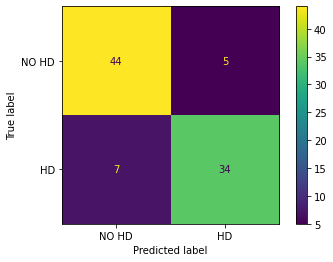

In [40]:
plot_confusion_matrix(clf,
                      X_test,
                      y_test,
                      display_labels = ["NO HD","HD"]
)

from above confusion matrix we ca say that 44+5 =49 does not have HD and out of them 44 (89.79%) correctly classified
and 7+34 = 41 have HD and out of them 34 (82.92%) correctly classified

Now we will optimize the parameter using cross validation

In [41]:
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [0.01,0.001, 0.0001], 
   'kernel': ['rbf']},
 ] #kernel - rbf

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train, y_train) #fit

print(optimal_params.best_params_) #print the best parameters

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


Now we see that ideal value of C=1, and ideal value of gamma = 0.001

In [42]:
model = SVC(C=1,gamma=0.001,kernel="rbf",random_state=42)
model.fit(X_train,y_train)

SVC(C=1, gamma=0.001, random_state=42)

In [43]:
y_pred = model.predict(X_test)

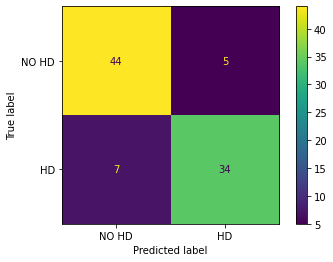

In [44]:
plot_confusion_matrix(clf,
                      X_test,
                      y_test,
                      display_labels = ["NO HD","HD"]
)

In [45]:
from sklearn.metrics import f1_score

In [46]:
f1_score(y_test,y_pred)

0.8641975308641976

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared_error(y_pred=y_pred,y_true = y_test)

0.12222222222222222

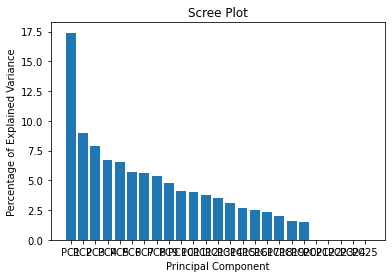

In [49]:
pca = PCA() # By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
#will choose the top 2 PCA for the 2D plotting

In [50]:
import matplotlib.colors as colors

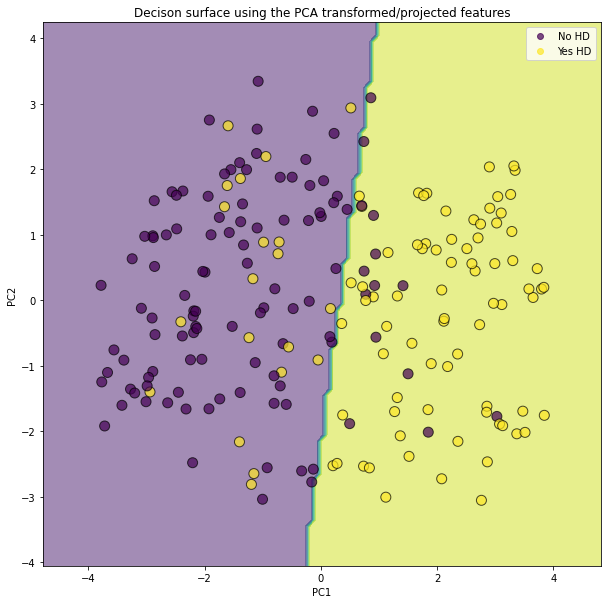

In [51]:
pc1 = X_train_pca[:, 0] 
pc2 = X_train_pca[:, 1]
model.fit(np.column_stack((pc1, pc2)), y_train) #fitting the PCs to the SVM

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = model.predict(np.column_stack((xx.ravel(), yy.ravel()))) ## Array of zeros and ones
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.5)  #will allow us to draw support vector boundary -- and color code it
scatter = ax.scatter(pc1, pc2, c=y_train, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
plt.savefig('svm.png')
plt.show()



##### so we have successfully predicted heart diseases with test-accuracy of 87.77%  